In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob
from csbdeep.utils import Path

In [2]:
use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? YES


In [3]:
train_files= sorted(glob('/home/isabella.osei/Projects/Training/*.tif'))
train_seg= sorted(glob('/home/isabella.osei/Projects/Training/*_mask.tif'))

test_files= sorted(glob('/home/isabella.osei/Projects/Validation/*.tif'))
test_seg= sorted(glob('/home/isabella.osei/Projects/Validation/*_mask.tif'))


In [4]:
train_f= list(map(io.imread, train_files))
train_s= list(map(io.imread,train_seg))

test_f= list(map(io.imread, test_files))
test_seg = list(map(io.imread, test_seg))


In [5]:
train_dir= "/home/isabella.osei/Projects/Training/"
test_dir= "/home/isabella.osei/Projects/Validation/"

In [6]:
len(train_f)

74

In [7]:
base= "/home/isabella.osei/CellPose/nucleitrain"

from cellpose import models

initial_md= "nuclei"
model_name= "nuclei_net"

n_epochs= 100

chan= 3
chan2= 0

Use_Default_Advanced_Parameters = True 
learning_rate = 0.1 
weight_decay = 0.0001

if (Use_Default_Advanced_Parameters): 
    print("Default advanced parameters enabled")
    learning_rate = 0.1 
    weight_decay = 0.0001
    
    
    
    
model_path = base + 'models/'
if os.path.exists(model_path+'/'+model_name):
    print("!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  









Default advanced parameters enabled


In [8]:
import os

files = os.listdir(train_dir)

masked = [f for f in files if 'mask' in f]
imgs = [f for f in files if 'mask' not in f]

masked.sort()
imgs.sort()

for i, m in zip(imgs, masked):
    if i[:-len('.tif')] != m[:-len('_mask.tif')]:
        print(i, m)

In [9]:
test_files= os.listdir(test_dir)
masks_test= [mask for mask in test_files if 'mask' in mask]
imgs_test= [image for image in test_files if 'mask' not in image]

masks_test.sort()
imgs_test.sort()

for i,m in zip(imgs_test,masks_test):
    if i[:-len('.tif')] == m[:-len('_mask.tif')]:
        print(i[:-len('.tif')], m[:-len('_mask.tif')])


HuCt_14924_SX-1 HuCt_14924_SX-1
HuCt_FRYL_LSM-1 HuCt_FRYL_LSM-1
HuCt_FRYLa-3 HuCt_FRYLa-3
HuCt_SX-1 HuCt_SX-1
HuCt_SXc-Sox2-2 HuCt_SXc-Sox2-2
IB24_HuCt14116_alto4-1 IB24_HuCt14116_alto4-1


In [10]:
logger = io.logger_setup()


model = models.CellposeModel(gpu=use_GPU, model_type=initial_md)
channels= [chan,chan2]


output = io.load_train_test_data(train_dir, test_dir, mask_filter='_mask')
train_data, train_labels, _, test_data, test_labels, _ = output


new_model_path = model.train(train_data, train_labels, 
                              test_data=test_data,
                              test_labels=test_labels,
                              channels=channels, 
                              save_path=train_dir, 
                              n_epochs=n_epochs,
                              learning_rate=learning_rate, 
                              weight_decay=weight_decay, 
                              nimg_per_epoch=8,
                              model_name=model_name)

2022-10-25 11:39:31,134 [INFO] WRITING LOG OUTPUT TO /home/isabella.osei/.cellpose/run.log
2022-10-25 11:39:31,156 [INFO] >> nuclei << model set to be used
2022-10-25 11:39:31,159 [INFO] ** TORCH CUDA version installed and working. **
2022-10-25 11:39:31,159 [INFO] >>>> using GPU
2022-10-25 11:39:31,728 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2022-10-25 11:39:31,741 [INFO] not all flows are present, running flow generation for all images
2022-10-25 11:39:32,078 [INFO] 37 / 37 images in /home/isabella.osei/Projects/Training/ folder have labels
2022-10-25 11:39:32,082 [INFO] not all flows are present, running flow generation for all images
2022-10-25 11:39:32,137 [INFO] 6 / 6 images in /home/isabella.osei/Projects/Validation/ folder have labels
2022-10-25 11:39:33,148 [INFO] computing flows for labels


100%|██████████| 37/37 [00:02<00:00, 15.65it/s]


2022-10-25 11:39:35,815 [INFO] computing flows for labels


100%|██████████| 6/6 [00:00<00:00, 19.78it/s]


2022-10-25 11:39:36,393 [INFO] >>>> median diameter set to = 17
2022-10-25 11:39:36,393 [INFO] >>>> mean of training label mask diameters (saved to model) 48.488
2022-10-25 11:39:36,394 [INFO] >>>> training network with 2 channel input <<<<
2022-10-25 11:39:36,394 [INFO] >>>> LR: 0.10000, batch_size: 8, weight_decay: 0.00010
2022-10-25 11:39:36,394 [INFO] >>>> ntrain = 37, ntest = 6
2022-10-25 11:39:36,395 [INFO] >>>> nimg_per_epoch = 37
2022-10-25 11:39:37,097 [INFO] Epoch 0, Time  0.7s, Loss 0.3271, Loss Test 0.3662, LR 0.0000
2022-10-25 11:39:37,815 [INFO] saving network parameters to /home/isabella.osei/Projects/Training/models/nuclei_net
2022-10-25 11:39:40,756 [INFO] Epoch 5, Time  4.4s, Loss 0.2857, Loss Test 0.2940, LR 0.0556
2022-10-25 11:39:44,272 [INFO] Epoch 10, Time  7.9s, Loss 0.2509, Loss Test 0.2689, LR 0.1000
2022-10-25 11:39:51,277 [INFO] Epoch 20, Time 14.9s, Loss 0.2298, Loss Test 0.2680, LR 0.1000
2022-10-25 11:39:58,261 [INFO] Epoch 30, Time 21.9s, Loss 0.2193, Lo

In [11]:
diam_labels=  model.diam_labels.copy()

In [12]:
output = io.load_train_test_data(test_dir, mask_filter='_mask')
test_data, test_labels = output[:2]

masks = model.eval(test_data, 
                   channels=[chan,chan2],
                   diameter=diam_labels)[0]

ap = metrics.average_precision(test_labels, masks)[0]
print('')
print(f'>>> average precision at iou threshold 0.5 = {ap[:,0].mean():.3f}')

2022-10-25 11:40:45,969 [INFO] not all flows are present, running flow generation for all images
2022-10-25 11:40:46,036 [INFO] 6 / 6 images in /home/isabella.osei/Projects/Validation/ folder have labels
2022-10-25 11:40:47,267 [INFO] 100%|##########| 6/6 [00:01<00:00,  4.88it/s]

>>> average precision at iou threshold 0.5 = 0.817


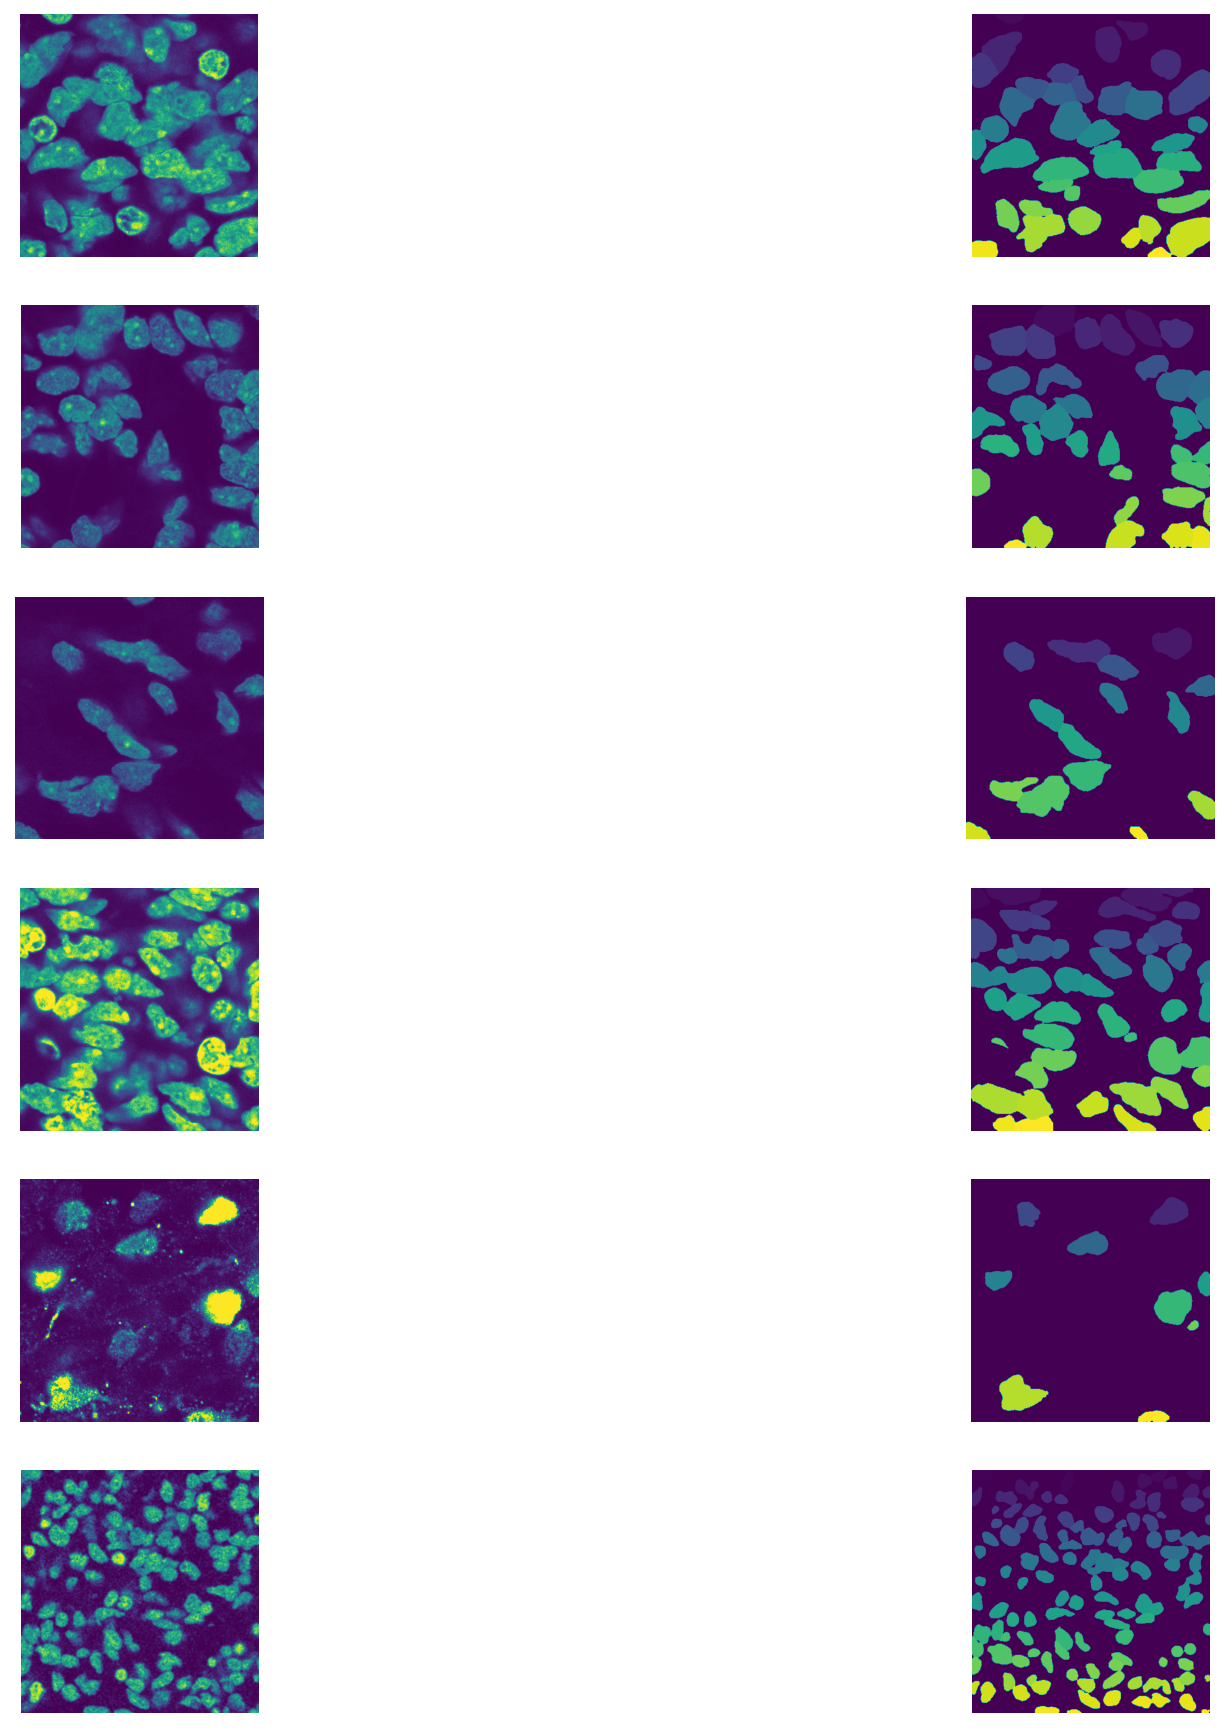

In [13]:
plt.figure(figsize=(15,15), dpi=150)
for k,im in enumerate(test_data):
    plt.subplot(len(test_data),2,2*k+1)
    plt.axis("off")
    plt.imshow(im, cmap= 'gray')
    
    plt.subplot(len(test_data),2,2*k+2)
    plt.axis("off")
    plt.imshow(masks[k])
    
    

In [14]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions= metrics.average_precision(test_labels, masks,threshold=[t for t in taus])



In [15]:
len(masks)

6

In [16]:
aps= precisions[0]

In [17]:
aps

array([[0.875     , 0.875     , 0.875     , 0.875     , 0.8292683 ,
        0.70454544, 0.70454544, 0.6304348 , 0.47058824],
       [0.9       , 0.9       , 0.9       , 0.85365856, 0.8095238 ,
        0.76744187, 0.76744187, 0.76744187, 0.38181818],
       [0.875     , 0.875     , 0.875     , 0.875     , 0.875     ,
        0.875     , 0.875     , 0.875     , 0.6666667 ],
       [0.8627451 , 0.8627451 , 0.8627451 , 0.8269231 , 0.8269231 ,
        0.72727275, 0.6964286 , 0.6101695 , 0.26666668],
       [0.8888889 , 0.8888889 , 0.8888889 , 0.8888889 , 0.8888889 ,
        0.7       , 0.7       , 0.30769232, 0.21428572],
       [0.7615894 , 0.7615894 , 0.7615894 , 0.716129  , 0.672956  ,
        0.5833333 , 0.49438202, 0.36410257, 0.07692308]], dtype=float32)

In [18]:
aps=aps.tolist()
aps

[[0.875,
  0.875,
  0.875,
  0.875,
  0.8292682766914368,
  0.7045454382896423,
  0.7045454382896423,
  0.6304348111152649,
  0.47058823704719543],
 [0.8999999761581421,
  0.8999999761581421,
  0.8999999761581421,
  0.8536585569381714,
  0.8095238208770752,
  0.7674418687820435,
  0.7674418687820435,
  0.7674418687820435,
  0.38181817531585693],
 [0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.6666666865348816],
 [0.8627451062202454,
  0.8627451062202454,
  0.8627451062202454,
  0.8269230723381042,
  0.8269230723381042,
  0.7272727489471436,
  0.6964285969734192,
  0.6101694703102112,
  0.2666666805744171],
 [0.8888888955116272,
  0.8888888955116272,
  0.8888888955116272,
  0.8888888955116272,
  0.8888888955116272,
  0.699999988079071,
  0.699999988079071,
  0.3076923191547394,
  0.2142857164144516],
 [0.7615894079208374,
  0.7615894079208374,
  0.7615894079208374,
  0.7161290049552917,
  0.6729559898376465,
  0.5833333134651184,
  0.49438202381134033,
  0.3641025722026825,


In [19]:
av_p={}


In [20]:
means=np.mean(aps,axis=0)
means

array([0.86053723, 0.86053723, 0.86053723, 0.83926659, 0.81709334,
       0.72626556, 0.70629965, 0.59247351, 0.3461581 ])

In [21]:
m= means.tolist()
for i in range(len(m)):
    m[i]= round(m[i],3)
    

In [22]:
for i,t in enumerate(taus):
    av_p[t]=m[i]

In [23]:
cellpose_ap=av_p

In [31]:
star_ap= [0.9175627240143369, 0.9175627240143369, 0.9175627240143369, 0.9068100358422939
             , 0.8673835125448028, 0.8100358422939068, 0.7347670250896058, 0.6129032258064516,
             0.18996415770609318]

In [32]:
av_pr_star={}
for i in range(len(taus)):
    av_pr_star[taus[i]]= round(star_ap[i],3)

In [33]:
stardist_ap=av_pr_star

In [34]:
import pandas as pd
st_df= pd.DataFrame(stardist_ap,index=["stardist"])

In [35]:
cellp_df= pd.DataFrame(cellpose_ap,index=["cellpose"])
cellp_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
cellpose,0.861,0.861,0.861,0.839,0.817,0.726,0.706,0.592,0.346


In [40]:
st_df.columns

Float64Index([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], dtype='float64')

In [45]:
av_df= pd.concat([st_df,cellp_df], axis=0)

In [46]:
av_df.



,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
stardist,0.918,0.918,0.918,0.907,0.867,0.810,0.735,0.613,0.190
cellpose,0.861,0.861,0.861,0.839,0.817,0.726,0.706,0.592,0.346


In [53]:
average = av_df.T

In [56]:
average.reset_index(inplace=True)
average = average.rename(columns = {'index': 'IoU'})

In [57]:
average

,IoU,stardist,cellpose
0,0.1,0.918,0.861
1,0.2,0.918,0.861
2,0.3,0.918,0.861
3,0.4,0.907,0.839
4,0.5,0.867,0.817
5,0.6,0.810,0.726
6,0.7,0.735,0.706
7,0.8,0.613,0.592
8,0.9,0.190,0.346


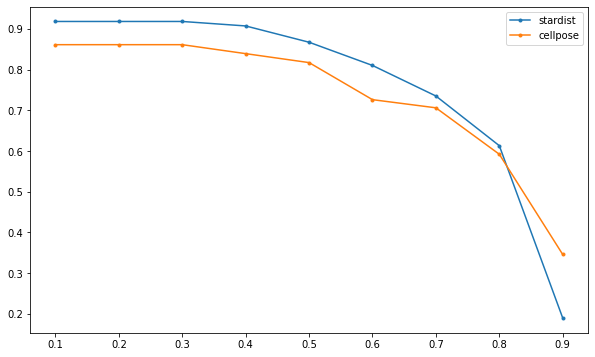

In [69]:
plt.figure(figsize=(10,6))
plt.plot(average["IoU"],average["stardist"],'.-',label="stardist")
plt.plot(average["IoU"],average["cellpose"],'.-',label="cellpose")
plt.legend()
plt.show()